In [3]:
# !pip install folium
# %time

CPU times: total: 0 ns
Wall time: 0 ns


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
file="./COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv"
df=pd.read_csv(file)


In [3]:
df.head(20)

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
0,07/07/2020,341,4,25.0,35,107,69,55,44,19,...,0.0,9.0,16.0,0.0,4.0,2.0,13.0,4.0,1.0,1.0
1,05/20/2022,1117,2,35.0,256,201,209,147,123,98,...,0.0,17.0,18.0,0.0,4.0,2.0,13.0,14.0,0.0,2.0
2,03/08/2022,165,2,12.0,44,40,24,16,14,12,...,0.0,6.0,6.0,0.0,3.0,1.0,5.0,3.0,0.0,0.0
3,10/31/2020,1066,10,82.0,136,272,222,169,130,86,...,0.0,38.0,44.0,0.0,24.0,3.0,32.0,19.0,2.0,2.0
4,06/11/2022,537,1,30.0,73,106,113,86,69,45,...,0.0,15.0,15.0,0.0,6.0,2.0,15.0,7.0,0.0,0.0
5,04/12/2020,341,33,136.0,28,32,56,54,60,46,...,0.0,56.0,80.0,0.0,34.0,4.0,67.0,25.0,6.0,0.0
6,12/28/2020,1666,18,79.0,203,367,360,217,243,170,...,0.0,38.0,41.0,0.0,22.0,4.0,30.0,20.0,3.0,0.0
7,07/03/2022,453,1,36.0,51,101,90,65,54,41,...,0.0,18.0,18.0,0.0,6.0,3.0,18.0,9.0,0.0,0.0
8,09/01/2022,564,0,20.0,142,64,107,71,78,50,...,0.0,12.0,8.0,0.0,3.0,1.0,5.0,11.0,0.0,0.0
9,05/28/2022,618,2,31.0,93,114,133,94,66,56,...,0.0,20.0,11.0,0.0,5.0,1.0,13.0,10.0,1.0,1.0


In [4]:
df.isnull().sum()

Date                                         1
Cases - Total                                0
Deaths - Total                               0
Hospitalizations - Total                     5
Cases - Age 0-17                             0
Cases - Age 18-29                            0
Cases - Age 30-39                            0
Cases - Age 40-49                            0
Cases - Age 50-59                            0
Cases - Age 60-69                            0
Cases - Age 70-79                            0
Cases -  Age 80+                             0
Cases - Age Unknown                          0
Cases - Female                               0
Cases - Male                                 0
Cases - Unknown Gender                       0
Cases - Latinx                               0
Cases - Asian Non-Latinx                     0
Cases - Black Non-Latinx                     0
Cases - White Non-Latinx                     0
Cases - Other Race Non-Latinx                0
Cases - Unkno

In [5]:
#replace the nan values
mean=df["Hospitalizations - Age 30-39"].mean()
age30_39=df["Hospitalizations - Age 30-39"].replace(np.nan,mean,inplace=True)

In [6]:
mean_totalhos=df["Hospitalizations - Total"].mean()
total_hos=df["Hospitalizations - Total"].replace(np.nan,mean_totalhos,inplace=True)
total_hos=df["Hospitalizations - Total"].replace(np.nan,mean_totalhos,inplace=True)

In [7]:
mean_totalhos

50.73884657236126

In [8]:
allCols=df["Hospitalizations - Age 60-69"]
# df["Hospitalizations - Age 40-49"]
mean_total_hos_all_col=allCols.mean()
clean=allCols.replace(np.nan,mean_total_hos_all_col,inplace=True)

# for x in 

In [9]:
df.isnull().sum()

Date                                         1
Cases - Total                                0
Deaths - Total                               0
Hospitalizations - Total                     0
Cases - Age 0-17                             0
Cases - Age 18-29                            0
Cases - Age 30-39                            0
Cases - Age 40-49                            0
Cases - Age 50-59                            0
Cases - Age 60-69                            0
Cases - Age 70-79                            0
Cases -  Age 80+                             0
Cases - Age Unknown                          0
Cases - Female                               0
Cases - Male                                 0
Cases - Unknown Gender                       0
Cases - Latinx                               0
Cases - Asian Non-Latinx                     0
Cases - Black Non-Latinx                     0
Cases - White Non-Latinx                     0
Cases - Other Race Non-Latinx                0
Cases - Unkno

In [10]:
df.describe(include="all")

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
count,923,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,...,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
unique,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,07/07/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,746.645022,8.484848,50.738847,120.586580,172.347403,149.440476,108.547619,88.294372,59.334416,...,0.011970,25.390642,25.340588,0.007617,13.104461,1.478781,23.168662,10.520131,1.643090,0.823721
std,NaN,1086.253735,10.445068,51.641876,223.482202,259.974858,219.551038,152.940095,121.971321,80.476989,...,0.108808,25.273984,27.130894,0.086990,15.334469,2.452897,24.651887,10.387659,2.299222,1.205219
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,267.750000,2.000000,22.000000,32.000000,60.000000,54.000000,36.750000,29.000000,19.000000,...,0.000000,11.000000,10.000000,0.000000,4.000000,0.000000,9.000000,4.000000,0.000000,0.000000
50%,NaN,460.000000,4.000000,33.000000,65.500000,106.000000,91.500000,66.000000,51.000000,33.500000,...,0.000000,17.000000,16.000000,0.000000,8.000000,1.000000,15.000000,8.000000,1.000000,0.000000
75%,NaN,826.000000,11.000000,57.250000,120.000000,184.500000,164.000000,122.250000,105.000000,74.000000,...,0.000000,30.000000,28.000000,0.000000,15.000000,2.000000,28.000000,13.000000,2.000000,1.000000


In [11]:
df.isnull().sum()

Date                                         1
Cases - Total                                0
Deaths - Total                               0
Hospitalizations - Total                     0
Cases - Age 0-17                             0
Cases - Age 18-29                            0
Cases - Age 30-39                            0
Cases - Age 40-49                            0
Cases - Age 50-59                            0
Cases - Age 60-69                            0
Cases - Age 70-79                            0
Cases -  Age 80+                             0
Cases - Age Unknown                          0
Cases - Female                               0
Cases - Male                                 0
Cases - Unknown Gender                       0
Cases - Latinx                               0
Cases - Asian Non-Latinx                     0
Cases - Black Non-Latinx                     0
Cases - White Non-Latinx                     0
Cases - Other Race Non-Latinx                0
Cases - Unkno

In [12]:
df.value_counts(df["Hospitalizations - Age 30-39"]).to_frame()

,0
Hospitalizations - Age 30-39,
2.000000,132
1.000000,127
3.000000,119
4.000000,107
5.000000,88
0.000000,65
6.000000,63
7.000000,54
10.000000,33


<AxesSubplot:xlabel='Hospitalizations - Age 30-39', ylabel='Hospitalizations - Total'>

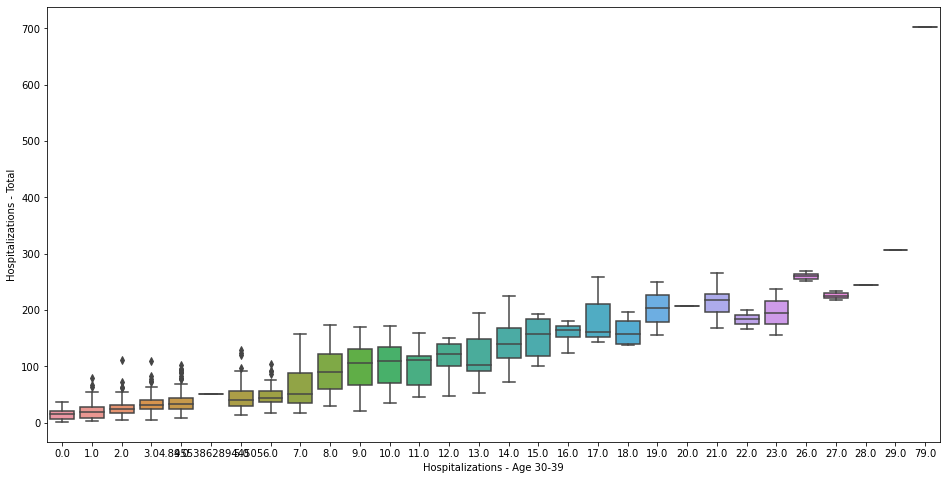

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df["Hospitalizations - Age 30-39"],y=df["Hospitalizations - Total"])

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.reset_index() #all the time must reset_index if you find null values

,index,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
0,0,2020-07-07,341,4,25.0,35,107,69,55,44,...,0.0,9.0,16.0,0.0,4.0,2.0,13.0,4.0,1.0,1.0
1,1,2022-05-20,1117,2,35.0,256,201,209,147,123,...,0.0,17.0,18.0,0.0,4.0,2.0,13.0,14.0,0.0,2.0
2,2,2022-03-08,165,2,12.0,44,40,24,16,14,...,0.0,6.0,6.0,0.0,3.0,1.0,5.0,3.0,0.0,0.0
3,3,2020-10-31,1066,10,82.0,136,272,222,169,130,...,0.0,38.0,44.0,0.0,24.0,3.0,32.0,19.0,2.0,2.0
4,4,2022-06-11,537,1,30.0,73,106,113,86,69,...,0.0,15.0,15.0,0.0,6.0,2.0,15.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,2021-02-10,366,11,49.0,51,101,69,42,44,...,0.0,19.0,30.0,0.0,17.0,1.0,19.0,11.0,1.0,0.0
920,920,2022-03-19,123,0,7.0,16,33,29,13,14,...,0.0,5.0,2.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0
921,921,2022-08-03,924,1,44.0,125,231,162,111,128,...,0.0,22.0,22.0,0.0,9.0,1.0,19.0,15.0,0.0,0.0
922,922,2021-10-24,204,4,7.0,49,41,54,23,16,...,0.0,3.0,4.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0


In [16]:
df_loc250=df.loc[200:250]

In [17]:
df_loc250

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
200,2021-04-27,564,5,57.000000,101,142,113,79,63,41,...,0.0,32.0,25.0,0.0,9.0,1.0,37.0,10.0,0.0,0.0
201,2021-11-23,722,4,40.000000,172,166,143,84,68,43,...,0.0,19.0,21.0,0.0,9.0,3.0,11.0,14.0,3.0,0.0
202,2022-08-30,710,0,31.000000,175,118,109,100,77,61,...,0.0,15.0,16.0,0.0,4.0,1.0,17.0,8.0,1.0,0.0
203,2021-09-18,310,4,26.000000,63,61,69,41,38,23,...,0.0,14.0,12.0,0.0,6.0,0.0,9.0,6.0,4.0,1.0
204,2020-06-22,218,9,32.000000,23,60,34,38,26,19,...,0.0,15.0,17.0,0.0,15.0,0.0,14.0,3.0,0.0,0.0
205,2020-04-11,397,33,142.000000,7,53,71,65,83,54,...,0.0,57.0,85.0,0.0,38.0,5.0,75.0,17.0,5.0,2.0
206,2020-08-29,234,4,25.000000,24,73,37,41,25,22,...,0.0,11.0,14.0,0.0,12.0,0.0,8.0,5.0,0.0,0.0
207,2021-08-10,531,4,41.000000,65,157,140,74,41,25,...,0.0,25.0,16.0,0.0,5.0,2.0,24.0,8.0,2.0,0.0
208,2020-06-08,273,15,43.000000,21,63,48,49,40,24,...,0.0,22.0,21.0,0.0,16.0,2.0,15.0,9.0,1.0,0.0
209,2020-08-27,382,2,24.000000,40,132,75,59,32,24,...,0.0,18.0,6.0,0.0,10.0,0.0,6.0,5.0,3.0,0.0


In [18]:
#create DataFrames
X=pd.DataFrame(df,columns=["Cases - Age 30-39"])
y=pd.DataFrame(df,columns=["Hospitalizations - Total"])
# X=df["Cases - Age 30-39"]
# y=df["Hospitalizations - Total"]

# X=age30_39
# y=total_hos

In [19]:
X.shape

(924, 1)

## show Map with folium

In [20]:
bins = df["Hospitalizations - Total"].quantile([0, 0.25, 0.5, 0.75, 1])
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[41.881832, -87.623177], zoom_start=14)

folium.Choropleth(
    geo_data=state_geo,
    data=df_loc250,
    columns=["Hospitalizations - Total"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Total Hospitalized (%)",
    bins=bins,
    reset=True,
).add_to(m)

m

IndexError: list index out of range

In [ ]:
m

In [ ]:
# f=np.polyfit(X,y,3)
# p=np.poly1d(f)

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel("Cases Age 30-39")
plt.ylabel("Hospitalized Total 2020-2022")

plt.scatter(X,y,alpha=0.3,s=60)

sns.regplot(X,y, line_kws={"lw":5,"color":"red"})

In [ ]:
plt.figure()
df.plot(x="Date",y="Cases - Age 30-39",figsize=(18,8))
df.plot(x="Date",y="Hospitalizations - Total",figsize=(18,8))
df.plot(x="Date",y="Cases - Age 60-69",figsize=(18,8))

## Install Folium


In [ ]:
# conda install folium -c conda-forge

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(999, inplace=True)

In [ ]:
X = X.values.astype(np.float)
y = y.values.astype(np.float) ## Dummy Varible

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr=LinearRegression()
regr.fit(X,y)

In [ ]:
X.shape

In [ ]:
# X=X.reshape(321,)

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(16,20))
plt.xlim(0,10000)
sns.barplot(x='Date',y='Hospitalizations - Total',data=df)

<AxesSubplot:>

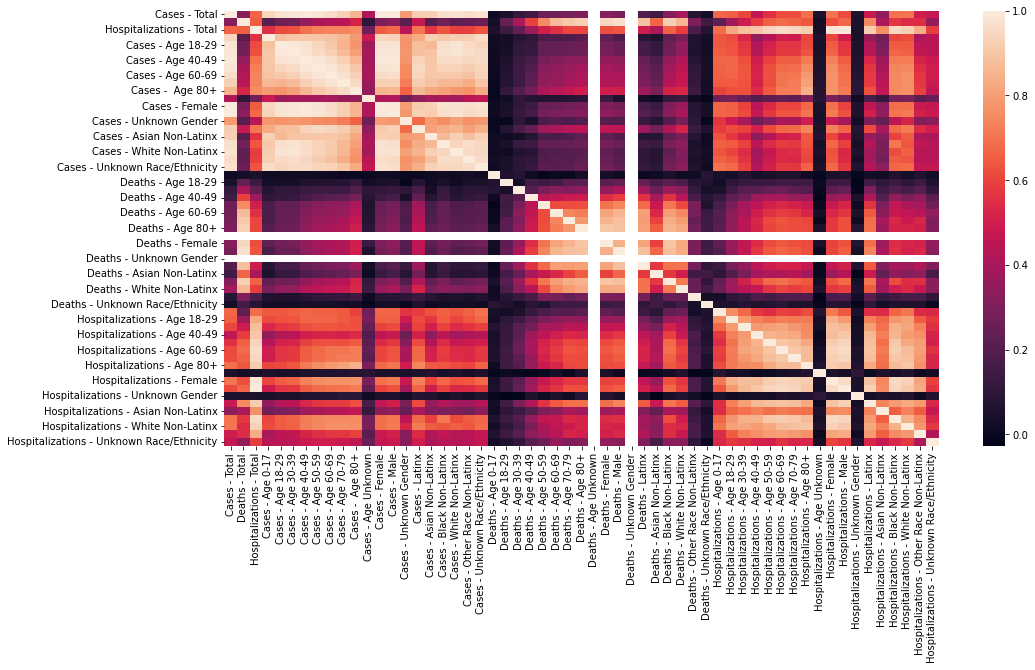

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

In [22]:
dfMean39=df["Cases - Age 30-39"].mean()
np.round(dfMean39,3)

149.44

NameError: name 'regr' is not defined

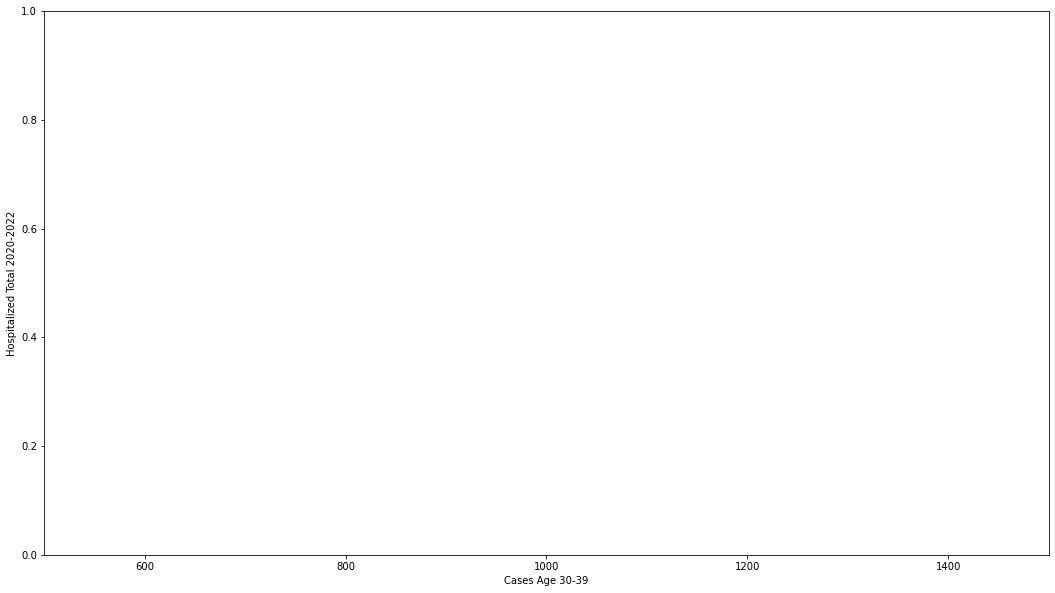

In [23]:
plt.figure(figsize=(18,10))
plt.xlabel("Cases Age 30-39")
plt.ylabel("Hospitalized Total 2020-2022")
plt.xlim(500,1500)

plt.scatter(X,regr.predict(X),alpha=0.3,color='red',linewidth=5)
plt.scatter(X,y,s=60,alpha=0.4)

In [ ]:
regr.score(X,y)

In [ ]:
predictions=regr.predict(X)

In [ ]:
df.plot(x="Date",y=regr.predict(X))

In [ ]:
plt.figure(figsize=(16,8))
# df.plot(x="Date",y=total_hos)

plt.scatter(x=df["Date"],y=regr.predict(X),c="blue",linewidths=5)
plt.ylim(0,500)
# sns.regplot(x="Date",y=regr.predict(X),data=df)
# plt.scatter(x=df["Hospitalizations - Age 30-39"],y=df["Hospitalizations - Total"],c="red")
# plt.scatter(regr.predict(X),y,c="magenta",linewidths=5) #train and test Data Predict

# plt.scatter(X,y,c="r")
# plt.scatter(predictions,y,c="blue")

In [ ]:
plt.scatter(x=df["Hospitalizations - Age 30-39"],y=regr.predict(X),c="red",linewidths=5)

In [ ]:
regr.predict(y)

In [ ]:
df.head()

##### Max count

In [ ]:
# df.drop(df["Date"],axis=0)

In [ ]:
# sns.heatmap(df)

## Scale and Split Data with Sklearn Tensorflow Keras

In [ ]:
from sklearn.model_selection import train_test_split

In [24]:
## Scale Data
from sklearn.preprocessing import MinMaxScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,train_size=0.5,random_state=200,shuffle=True)

NameError: name 'train_test_split' is not defined

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [28]:
X_test = scaler.transform(X_test)

NameError: name 'X_test' is not defined

In [29]:
X_train.shape

NameError: name 'X_train' is not defined

In [30]:
X_train.reshape(462,)

NameError: name 'X_train' is not defined

In [31]:
X_test.shape

NameError: name 'X_test' is not defined

In [32]:
X_test.reshape(231,)

NameError: name 'X_test' is not defined

In [33]:
len(df)

924

## Modeling TF2

In [34]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [35]:
adam=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=True,
    name='Adam')
# 
# adam=tf.keras.optimizers.Adam(learning_rate=0.0000000001)
# loss=keras.losses.SparseCategoricalCrossentropy()
# def custom_mean_squared_error(y_true, y_pred):
#     return tf.math.reduce_mean(tf.square(y_true - y_pred))




In [36]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=adam,loss="mse")

In [37]:
# model.summary()

##### Model compile

In [38]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400) ##batchsize auf 128 setzen
%time

NameError: name 'X_train' is not defined

In [349]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

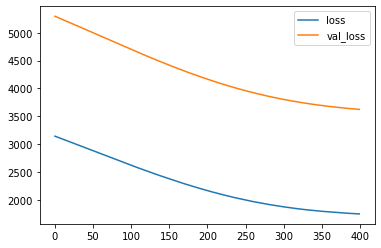

In [350]:
losses.plot()

In [351]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [352]:
X_test

array([[3.19042871e-02],
       [3.68893320e-02],
       [7.97607178e-03],
       [2.14356929e-02],
       [7.97607178e-03],
       [3.14057827e-02],
       [1.19641077e-02],
       [2.79162512e-02],
       [6.28115653e-02],
       [8.72382851e-02],
       [1.34596211e-01],
       [3.29012961e-02],
       [4.78564307e-02],
       [2.89132602e-02],
       [1.89431705e-02],
       [4.73579262e-02],
       [3.93818544e-02],
       [1.51046859e-01],
       [3.04087737e-02],
       [5.33399801e-02],
       [9.02293121e-02],
       [4.73579262e-02],
       [1.49551346e-02],
       [2.44267198e-02],
       [4.08773679e-02],
       [3.93818544e-02],
       [4.93519442e-02],
       [4.08773679e-02],
       [6.48055833e-02],
       [3.58923230e-02],
       [4.98504487e-02],
       [1.69491525e-02],
       [4.68594217e-02],
       [9.55633101e-01],
       [2.34297109e-02],
       [1.84446660e-02],
       [6.63010967e-02],
       [2.89132602e-02],
       [6.43070788e-02],
       [6.03190429e-02],


In [353]:
predictions = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [354]:
mean_absolute_error(X_test,predictions)

46.19694193180268

In [322]:
predictions = model.predict(X_test)

8/8 [==============================] - 0s 4ms/step


In [297]:
mean_absolute_error(X_test,predictions)

50.71539006374377

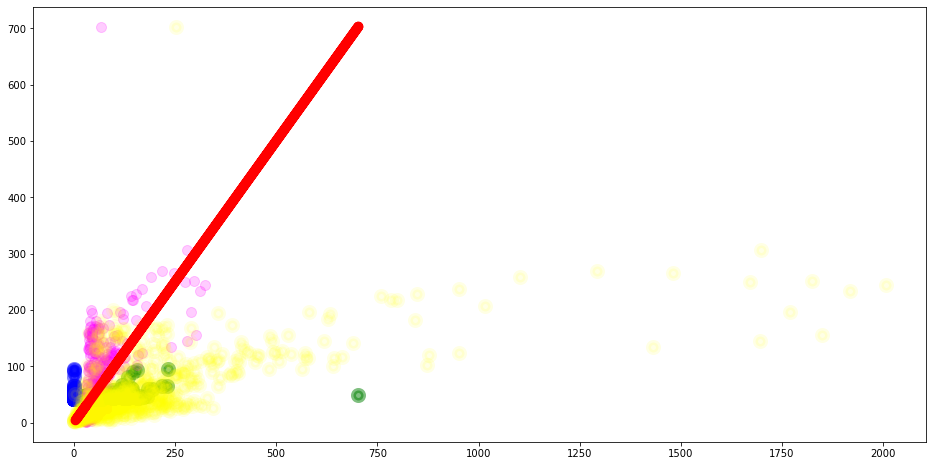

In [356]:
#our predictions
plt.figure(figsize=(16,8))
plt.scatter(y_test,predictions,s=100,alpha=0.5,linewidth=5,c='green') #predictions y_test
plt.scatter(X_test,predictions,s=100,alpha=0.5,linewidth=5,c='blue')#predict X_test
plt.scatter(regr.predict(X),y,s=100,alpha=0.2,c="magenta") #regr Prediction
plt.scatter(X,y,s=100,alpha=0.1,linewidths=5,c="yellow") #the Scatter of the PD.Dataframe Timeseries


# Perfect predictions
plt.plot(y_test,y_test,'r',linewidth=10)

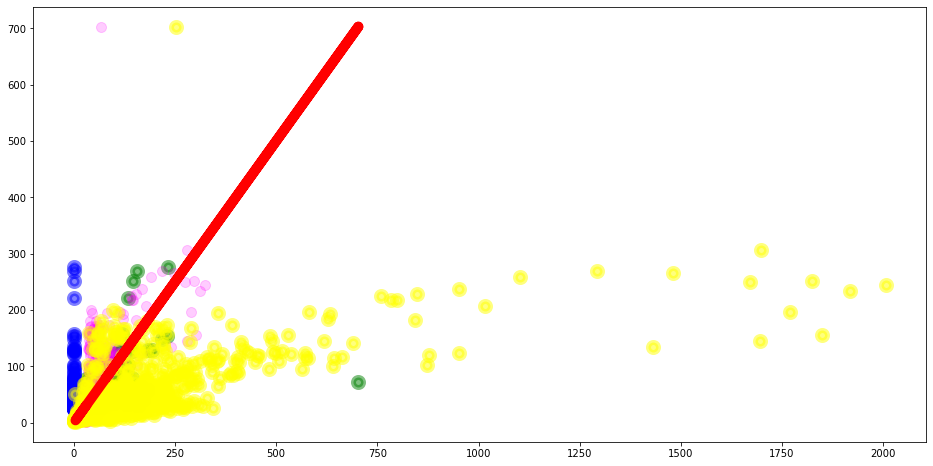

In [272]:
# before plot
#our predictions
plt.figure(figsize=(16,8))
plt.scatter(y_test,predictions,s=100,alpha=0.5,linewidth=5,c='green') #predictions y_test
plt.scatter(X_test,predictions,s=100,alpha=0.5,linewidth=5,c='blue')#predict X_test
plt.scatter(regr.predict(X),y,s=100,alpha=0.2,c="magenta") #regr Prediction
plt.scatter(X,y,s=100,alpha=0.5,linewidths=5,c="yellow") #the Scatter of the PD.Dataframe Timeseries


# Perfect predictions
plt.plot(y_test,y_test,'r',linewidth=10)

In [219]:
regr.score(X_train,y_train)

-0.2000481525046338

In [93]:
sns.violinplot(X,y)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [94]:
explained_variance_score(y_test,predictions)

0.229964251960168

In [95]:
errors = y_test.reshape(231, 1) - predictions

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

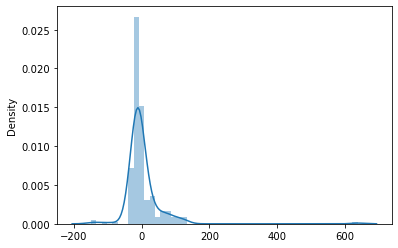

In [96]:
sns.distplot(errors)

In [97]:
total_hospitalize = df.drop('Date',axis=1).iloc[0]

In [98]:
total_hospitalize.shape

(57,)

In [99]:
total_hospitalize.reshape(57,0)

AttributeError: 'Series' object has no attribute 'reshape'

In [100]:
total_hospitalize = scaler.transform(total_hospitalize)

ValueError: Expected 2D array, got 1D array instead:
array=[341.   4.  25.  35. 107.  69.  55.  44.  19.   8.   4.   0. 184. 156.
   1. 107.  12.  95.  85.  11.  31.   0.   0.   0.   0.   0.   3.   0.
   1.   0.   3.   1.   0.   3.   0.   1.   0.   0.   0.   0.   2.   3.
   2.   5.   4.   6.   3.   0.   9.  16.   0.   4.   2.  13.   4.   1.
   1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [101]:
total_hospitalize

Cases - Total                                341.0
Deaths - Total                                 4.0
Hospitalizations - Total                      25.0
Cases - Age 0-17                              35.0
Cases - Age 18-29                            107.0
Cases - Age 30-39                             69.0
Cases - Age 40-49                             55.0
Cases - Age 50-59                             44.0
Cases - Age 60-69                             19.0
Cases - Age 70-79                              8.0
Cases -  Age 80+                               4.0
Cases - Age Unknown                            0.0
Cases - Female                               184.0
Cases - Male                                 156.0
Cases - Unknown Gender                         1.0
Cases - Latinx                               107.0
Cases - Asian Non-Latinx                      12.0
Cases - Black Non-Latinx                      95.0
Cases - White Non-Latinx                      85.0
Cases - Other Race Non-Latinx  

In [ ]:
model.predict(total_hospitalize)

In [ ]:
df.loc["Date"]=="2022-03-08 00:00:00"

In [ ]:
df.tail()